In [19]:
import sys
sys.path.append('../..')
import ugent
from strands import Schrodinger2D, Rectangle

V = lambda x, y: x*x + y*y

s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5), gridSize=[41,41], maxBasisSize=32)
eigenfunctions = s.eigenfunctions(12)

In [42]:
xs = np.linspace(-5, 5, 200)
ys = xs

X, Y = np.meshgrid(xs, ys)
fss = []
for e, f in eigenfunctions:
    fs = f(X, Y)
    for a in fss:
        fs -= a * np.sum(a * fs) / np.sum(a * a)
    fs /= np.max(np.abs(fs))
    fss.append(fs)

2
4
4
6
6
6
8
8
8
8
10
10


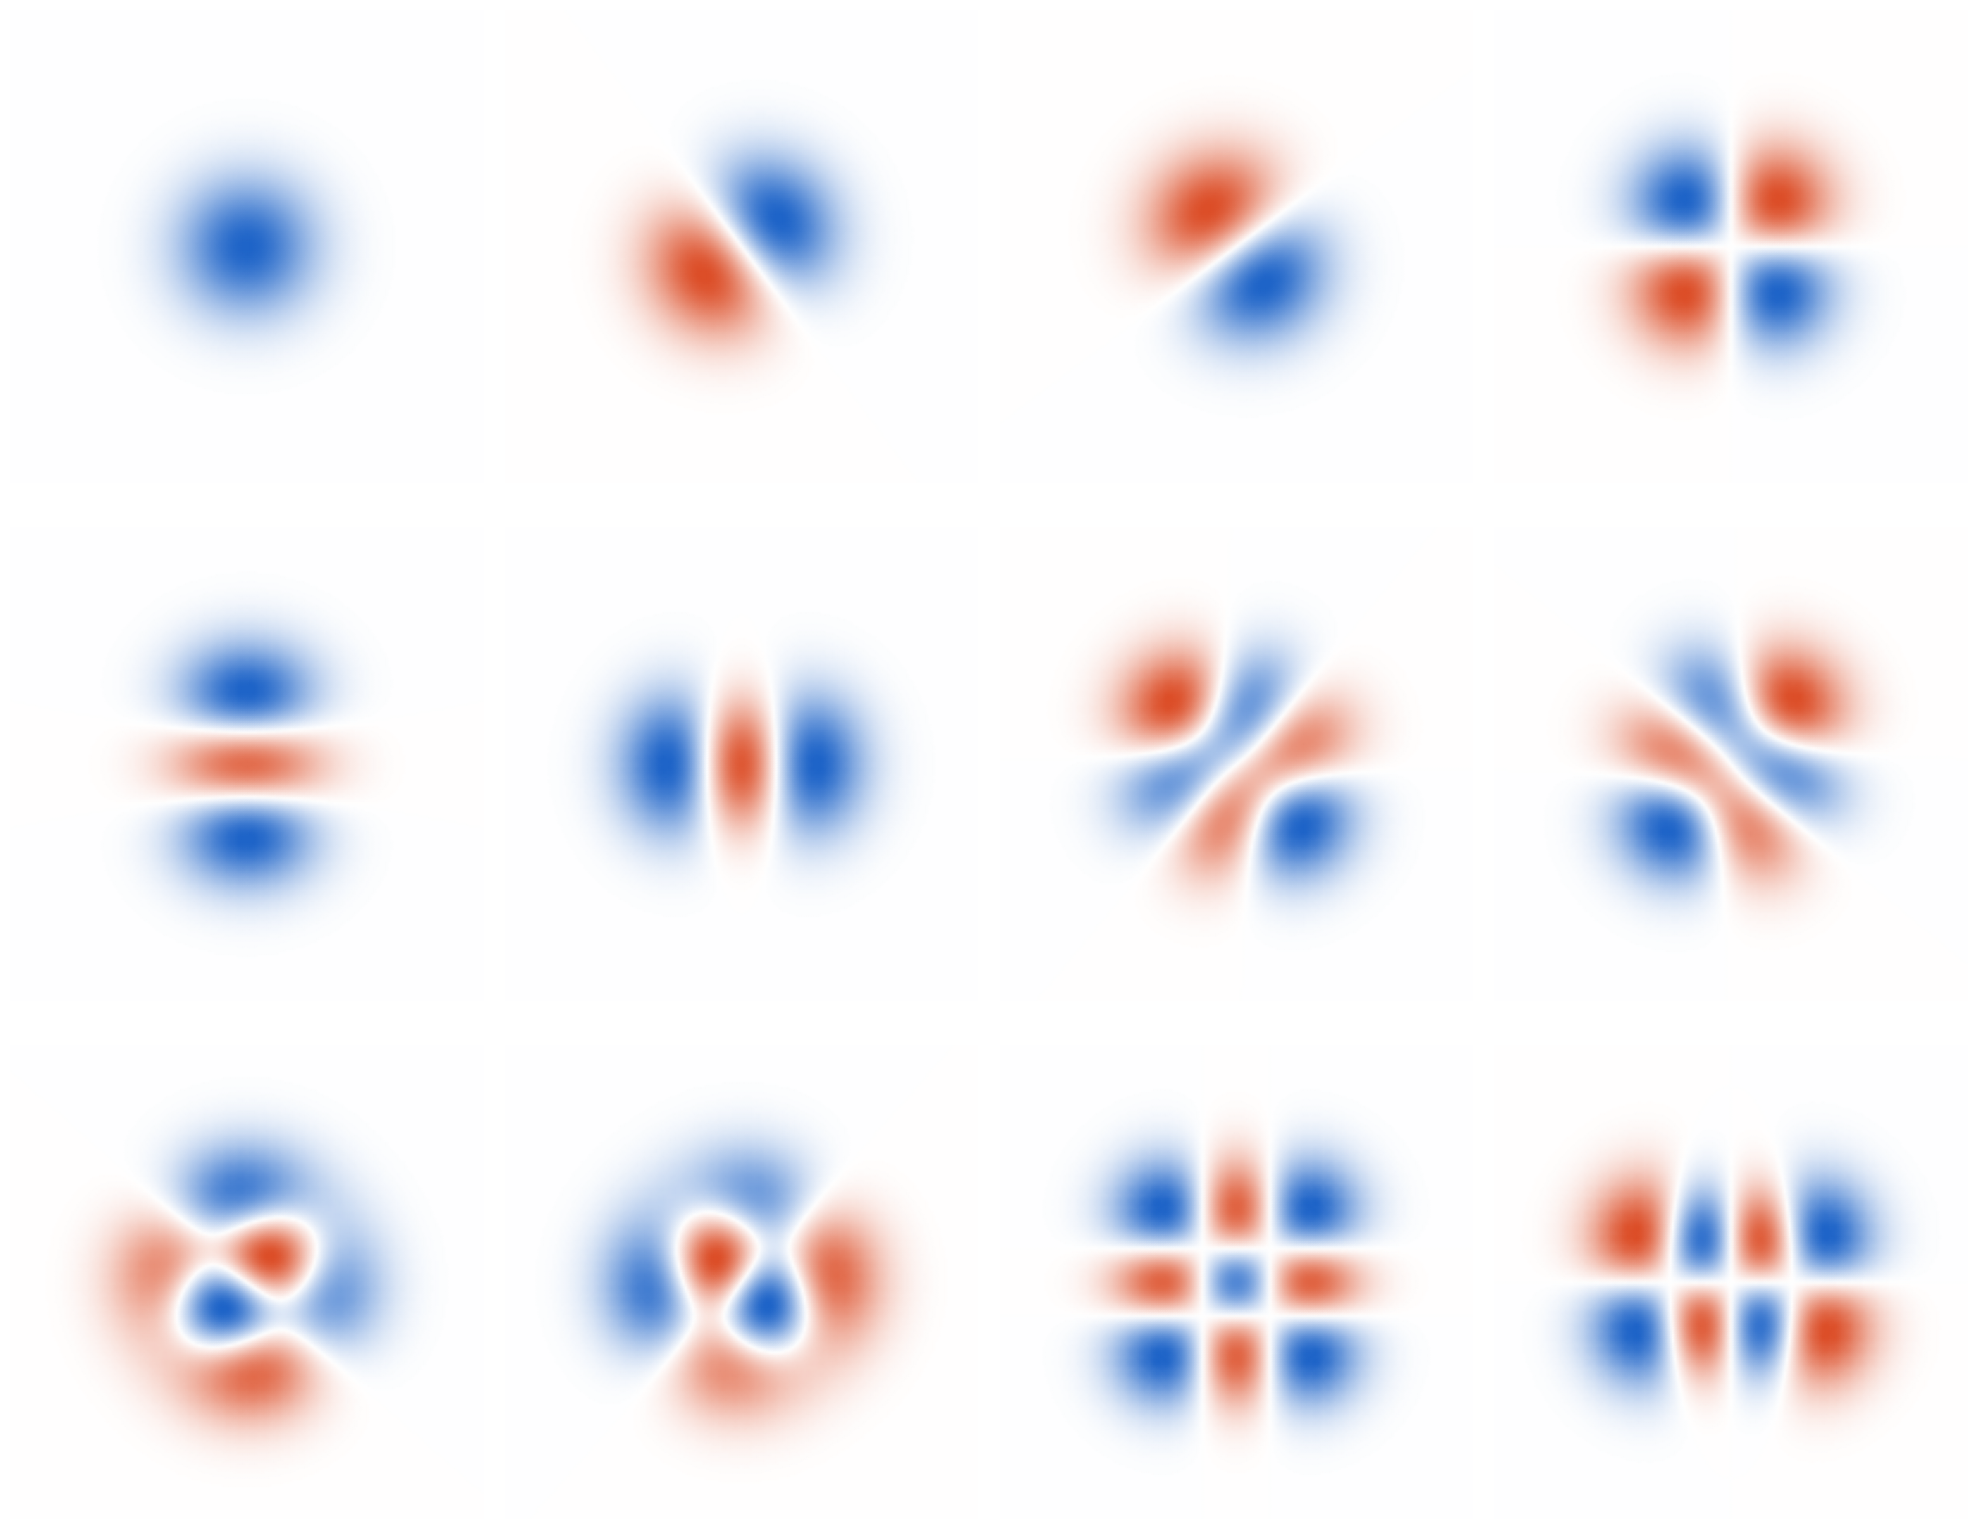

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, axs = plt.subplots(3, 4, figsize=(20, 16))

for row in axs:
    for ax in row:
        ax.axis('off')
        ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
        ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())

letters = "abcdef"
last_e = 0
letters_i = 0
for plot_i,((e, f), fs) in enumerate(zip(eigenfunctions, fss)):
    e = int(np.round(np.real(e)))
    
    if e != last_e:
        last_e = e
        letters_i = 0
    else:
        letters_i += 1
    
    fig1, ax1 = plt.subplots()
    ax1.axis('off')
    ax1.set_aspect(1)
    ax1.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax1.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax1.pcolormesh(xs, ys, fs, shading='gouraud', vmin=-1, vmax=1, cmap=ugent.RdBu, zorder=5)
    fig1.tight_layout()
    print(np.real(e))
    fig1.savefig(f"harmonic/{e}{letters[letters_i]}.png", dpi=500, bbox_inches = 'tight',
    pad_inches = 0)
    plt.close(fig1)
        
    ax = axs[plot_i // 4, plot_i%4]
    ax.set_aspect(1)
    ax.pcolormesh(xs, ys, fs, shading='gouraud', vmin=-1, vmax=1, cmap=ugent.RdBu, zorder=5)

fig.tight_layout()
fig.savefig("harmonic.pdf", bbox_inches="tight")

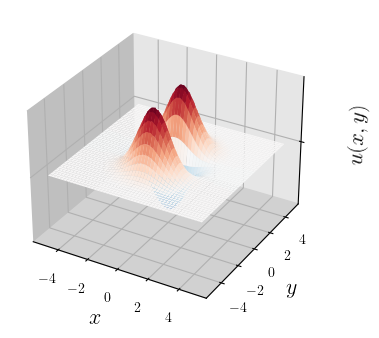

In [55]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, StrMethodFormatter

fig, ax = plt.subplots(1, 1,subplot_kw=dict(projection='3d'), figsize=(8, 4))

ax.w_xaxis.set_pane_color((.75, .75, .75, 1.0))
ax.w_yaxis.set_pane_color((.9, .9, .9, 1.0))
ax.w_zaxis.set_pane_color((.82, .82, .82, 1.0))

Z = fss[4]
X, Y = np.meshgrid(xs, ys)
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(3))
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.zaxis.set_tick_params(labelsize=10)
ax.set_zticks([0])
ax.set_zticklabels([""])
ax.set_xlabel('$x$', size=16)
ax.set_ylabel('$y$', size=16)
ax.set_zlabel('$u(x, y)$', size=16)
ax.yaxis._axinfo['label']['space_factor'] = 0.0
ax.plot_surface(X, Y, Z, cmap=plt.cm.RdBu_r, vmin=-1, vmax=1, alpha=1, linewidth=0, antialiased=True)
fig.savefig("harmonic_3d.png", dpi=500, bbox_inches="tight")